In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
import argparse
import pickle
import sys
sys.path.append("../") 
from utils_so import *
import scipy.linalg  as sla

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm, trange
%load_ext autoreload
%autoreload 2
# https://plotly.com/python/static-image-export/ need to install this if you want to save images
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoicmF0bGlmZmxqIiwiYSI6ImNqOGJ4cm8wcjAzN3QyeG1zcnZvMjB5bGUifQ.iRkpBPE-WANBkVc9ffI8ng")

# set flags
verbose=False # print out stuff for debugging
centered=False # centering the data

import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
cs=get_colors(100) # sample return:  ['#8af5da', '#fbc08c', '#b741d0']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\|x^\ast(u)-x^{\tt so}\|^2$

$f_{\tt so}(u)=\frac{1}{2}\|x^\ast(u)-x^{\tt so}\|^2$

$x^\ast(u)=\text{\tt NE}(f_1(x;u),f_2(x;u))$

$\begin{bmatrix}
\nabla_1f_1\\ 
\nabla_2f_2
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+u_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+u_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\nabla_1f_1(;u_1)\\ 
\nabla_2f_2(; u_2)
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+u_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+u_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}\begin{bmatrix}
x_1\\ x_2
\end{bmatrix}-\frac{1}{2}\begin{bmatrix}
\xi_1\\ \xi_2
\end{bmatrix}=\frac{1}{2}\begin{bmatrix}
u_1\\ u_2
\end{bmatrix}$



$\nabla_u f_{\tt so}(u)=\nabla_ux^\ast(u)(x^\ast(u)-x^{\tt so}) = \begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-\top}\left(\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\begin{bmatrix}u_1\\ u_2
\end{bmatrix}-x^{\tt so}\right)$

$x,x^{\tt so}\in \mathbb{R}^{d\times 1}$

$\nabla_u f_{\tt so}\in \mathbb{R}^{d\times 1}$

$$\begin{bmatrix}
x_1\\ x_2
\end{bmatrix}=\frac{1}{2}\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\left(\begin{bmatrix}
u_1\\ u_2
\end{bmatrix}+\begin{bmatrix}
\xi_1\\ \xi_2
\end{bmatrix}\right)$$

$\widehat{\nabla_u f_{\tt so}}(u)=\nabla_ux^\ast(u)(x^\ast(u)-x^{\tt so}) = \frac{1}{2}\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-\top}\left(\frac{1}{2}\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\left(\begin{bmatrix}
u_1\\ u_2
\end{bmatrix}+\begin{bmatrix}
\xi_1\\ \xi_2
\end{bmatrix}\right)-x^{\tt so}\right)$

$x\in \mathbb{R}^n$, $u\in \mathbb{R}^m$, $\xi\in \mathbb{R}^m$

$A_{ii}\in \mathbb{R}^{m_i\times n_i}$, $A_{ij}\in \mathbb{R}^{m_i\times n_j}$

In [157]:
ix.x_

array([[8.64985879],
       [4.57078137]])

In [85]:
# run all three cases

loc_cap=1
nu=0.0001 #0.001 and B=4 #0.0005 B=5 #0.00025 B=5/6
eta=5e-5 #1e-4
lam1=2
lam2=2
loc_lst_index=list(range(0,loc_cap))
price_lst_index=list(range(0,1))
x0=np.random.rand(2,loc_cap)
p1=1; p2=0.5

MAXITER=10000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()
alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

dic_rgd_ns={}
dic_so_ns={}
dic_sgd_ns={}
for price_index in range(0,1):

    dic_sgd_ns[price_index]=ddgame.runSGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER, perform_sgd=[True,True],tot_rev=0)
    #dic_agd_n=ddgame.runAGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER,tot_rev=0)
    dic_so_ns[price_index]=ddgame.runSO(x0,eta=0.001,price_index=price_index,MAXITER=MAXITER,tot_rev=0)

../data/datadic.p
18.055355072021484
Price we are running at :  10
Price we are running at :  10


In [158]:
x_so=np.mean(np.asarray(dic_so_ns[0]['x'][-10:]), axis=0)
dic_sgd_ns[0]['x'][-1:], x_so



([array([[5.97977227],
         [3.03653996]])],
 array([[8.64985879],
        [4.57078137]]))

In [175]:
x_so=np.array([[6],[3]])
ix=incent(x_so,ddgame,x0, d=loc_cap, MAXOUTER=5000, MAXINNER=500, seed=42, n=2, eta=5e-3, m=1, gamma=1e-1) #5e-3"=

In [88]:
x0

array([[0.01185063],
       [0.6462033 ]])

In [168]:
ix.x_star(ix.u_so)

array([[6.],
       [3.]])

In [169]:
ix.u_so

array([[ 1.63885858],
       [-8.17516544]])

In [195]:
np.random.seed(42)
u0=np.random.rand(2,loc_cap)
u0=150*np.random.rand(2,loc_cap) #ix.u_so+
M=1000
ix.runIncentOpt(x0,ix.u_so+2, gamma=100, MAXOUTER=M)
print(ix.x_star(ix.us[-1]))
print(ix.us[-1])
err_opt=ix.err_x

[[5.99997011]
 [3.00006878]]
[[ 1.63381188]
 [-8.16499946]]


In [215]:
np.random.seed(42)
u0=np.random.rand(2,loc_cap)
u0=150*np.random.rand(2,loc_cap) #ix.u_so+
M=1000
ix.runIncent(x0,ix.u_so+2, gamma=100, MAXOUTER=M, MEAN=False)
print(ix.x_star(ix.us[-1]))
print(ix.us[-1])
print(ix.x_s[-1])

[[5.99340021]
 [2.99708217]]
[[ 1.13242069]
 [-8.43418108]]
[[6.01799256]
 [3.00664454]]


In [210]:
np.mean(ix.ddgame.ql_[:,:,ix.ddgame.price_index_sgd].T)
np.var(ix.ddgame.ql_[:,:,ix.ddgame.price_index_sgd].T)/100

128.49086734693878

In [179]:
ix._getoptgradF(ix.u_so,ix.x_star(ix.u_so))

array([[1.02961417e-17],
       [2.49958371e-18]])

In [213]:
ix.err_u

array([2.78629741, 2.74486699, 2.70412465, 2.66405936, 2.62466025,
       2.58591665, 2.54781804, 2.51035405, 2.47351451, 2.43728939,
       2.40166881, 2.36664306, 2.33220259, 2.29833798, 2.26503997,
       2.23229945, 2.20010744, 2.16845511, 2.13733377, 2.10673486,
       2.07664995, 2.04707075, 2.0179891 , 1.98939697, 1.96128644,
       1.93364973, 1.90647917, 1.87976721, 1.85350642, 1.82768949,
       1.80230921, 1.7773585 , 1.75283036, 1.72871794, 1.70501446,
       1.68171325, 1.65880775, 1.63629151, 1.61415815, 1.59240142,
       1.57101514, 1.54999324, 1.52932974, 1.50901874, 1.48905444,
       1.46943113, 1.45014318, 1.43118504, 1.41255126, 1.39423646,
       1.37623534, 1.3585427 , 1.34115338, 1.32406234, 1.30726459,
       1.29075521, 1.27452937, 1.25858232, 1.24290935, 1.22750584,
       1.21236725, 1.19748909, 1.18286693, 1.16849643, 1.1543733 ,
       1.14049332, 1.12685233, 1.11344622, 1.10027097, 1.08732258,
       1.07459716, 1.06209083, 1.0497998 , 1.03772032, 1.02584

Text(0, 0.5, 'incentives')

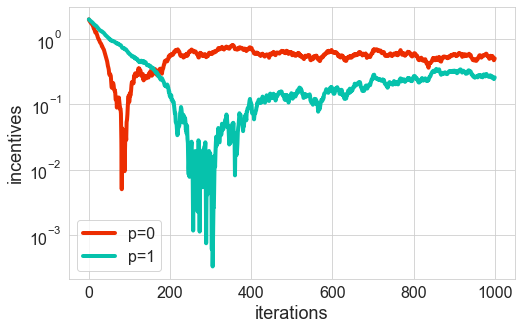

In [216]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
us=np.asarray(ix.us)
uso=np.asarray(ix.u_so)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(abs(us[:,j]-uso[j]),color=colors[j],label="p={}".format(j), linewidth=lw)
plt.legend(loc='best', fontsize=fs-2)
plt.yscale('log')
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('incentives',fontsize=fs)

In [128]:
ix.x_star_s.shape, , ix.x_star_s[0,:]

((10001, 2, 1),
 array([[8.65394922],
        [4.57319746]]),
 array([[8.72189232],
        [4.61834094]]))

In [135]:
err_x=[]
for i in range(M):
    err_x.append(la.norm(ix.x_star_s[i,:]-ix.x_star(ix.u_so)))
err_x=np.asarray(err_x)
err_x.shape

(10000,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'error player strategies')

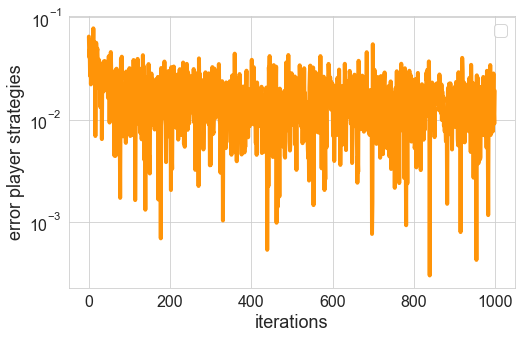

In [217]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4


plt.figure(figsize=(8,5))
#for j in range(2):
plt.plot(ix.err_x,color=colors[2], linewidth=lw) #label="p={}".format(j)
plt.legend(loc='best', fontsize=fs-2)
plt.yscale('log')
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('error player strategies',fontsize=fs)

In [44]:
np.random.seed(42)
u0=np.random.rand(2,loc_cap)
u0=150*np.random.rand(2,loc_cap) #ix.u_so+
ix.runIncent(x0,ix.u_so, OPT=True)
ix.us

[array([[191.82934879],
        [151.49317664]]),
 array([[191.75212443],
        [151.4661948 ]]),
 array([[191.6689301 ],
        [151.37318526]]),
 array([[191.6638768 ],
        [151.27985411]]),
 array([[191.61337571],
        [151.27418044]]),
 array([[191.61320892],
        [151.21220495]]),
 array([[191.60992893],
        [151.15159223]]),
 array([[191.60146288],
        [151.14233478]]),
 array([[191.51568866],
        [151.05326939]]),
 array([[191.48908838],
        [151.0434532 ]]),
 array([[191.41980284],
        [150.95343828]]),
 array([[191.39771643],
        [150.88465484]]),
 array([[191.36805765],
        [150.79494451]]),
 array([[191.30186264],
        [150.74995091]]),
 array([[191.29695423],
        [150.71274114]]),
 array([[191.25211083],
        [150.71086004]]),
 array([[191.20475408],
        [150.6172201 ]]),
 array([[191.18903994],
        [150.58581208]]),
 array([[191.17087029],
        [150.57023614]]),
 array([[191.13260801],
        [150.47509409]]),


In [57]:
ix.runSGP(x0,ix.u_so-10, eta=0.001)

In [51]:
x.shape

(501, 2, 1)

Text(0, 0.5, 'prices')

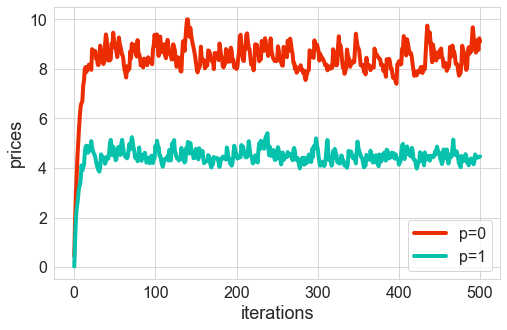

In [58]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
x=np.asarray(ix.x_sgd)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(x[:,j,0],color=colors[j],label="p={}".format(j), linewidth=lw)
plt.legend(loc='best', fontsize=fs-2)
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('prices',fontsize=fs)


In [33]:
us=np.asarray(ix.us)
us[-1]

array([[173.06834309],
       [132.14214569]])

Text(0, 0.5, 'incentives')

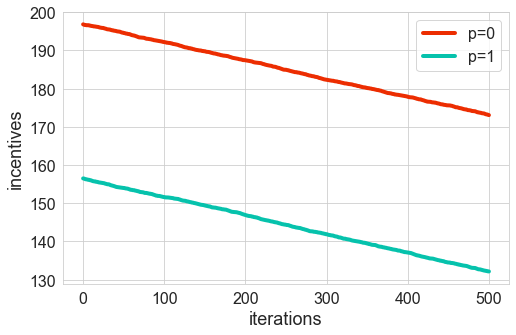

In [36]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(us[:,j],color=colors[j],label="p={}".format(j), linewidth=lw)
plt.legend(loc='best', fontsize=fs-2)
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('incentives',fontsize=fs)